In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [9]:
cols = ["fLength", "fWidth", "fSize", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('./drive/MyDrive/magic04.data', names=cols)
df.head()

fLength  fWidth   fSize  fConc1     fAsym  fM3Long  fM3Trans  \
28.7967    16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
31.6036    11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
23.8172     9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
75.1362    30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

           fAlpha     fDist class  
28.7967   40.0920   81.8828     g  
31.6036    6.3609  205.2610     g  
162.0520  76.9600  256.7880     g  
23.8172   10.4490  116.7370     g  
75.1362    4.6480  356.4620     g

In [10]:
df["class"] = (df["class"] == 'g').astype(int)
df.head()

fLength  fWidth   fSize  fConc1     fAsym  fM3Long  fM3Trans  \
28.7967    16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
31.6036    11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
23.8172     9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
75.1362    30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

           fAlpha     fDist  class  
28.7967   40.0920   81.8828      1  
31.6036    6.3609  205.2610      1  
162.0520  76.9600  256.7880      1  
23.8172   10.4490  116.7370      1  
75.1362    4.6480  356.4620      1

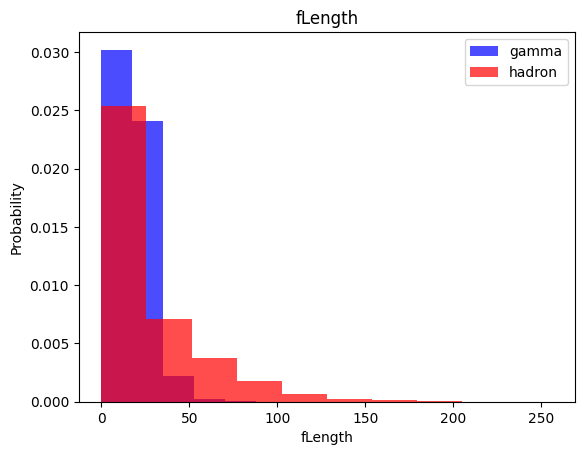

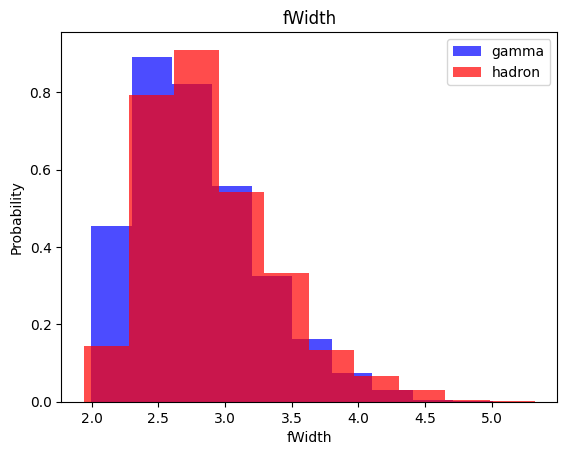

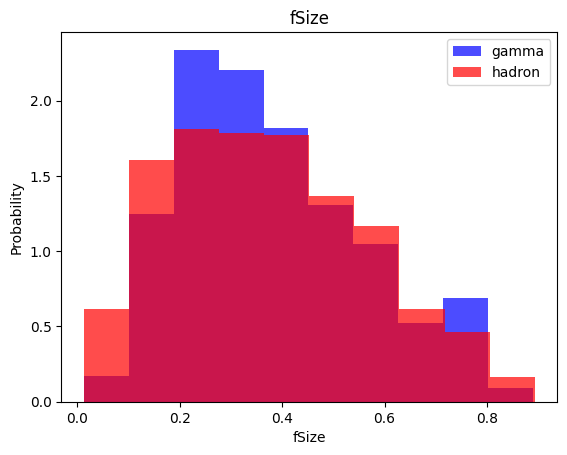

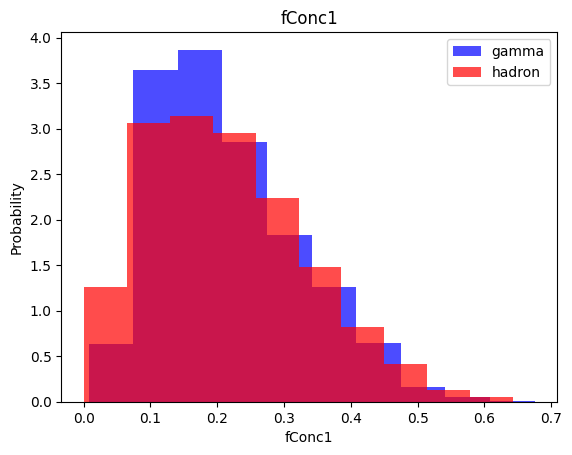

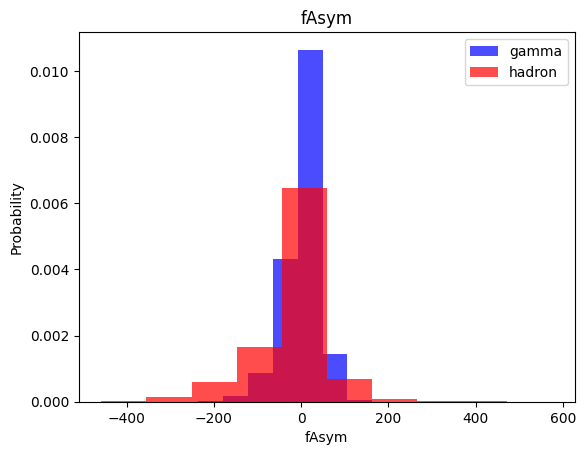

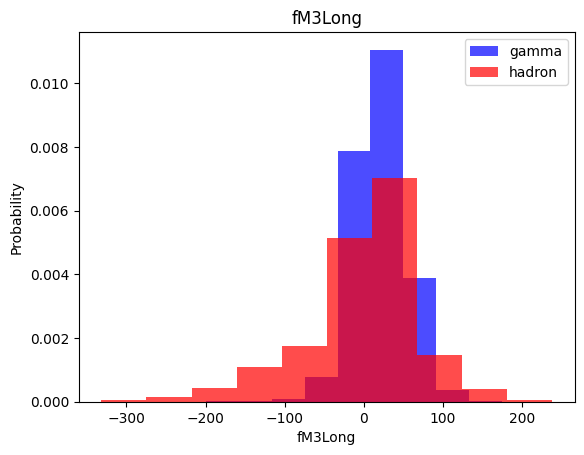

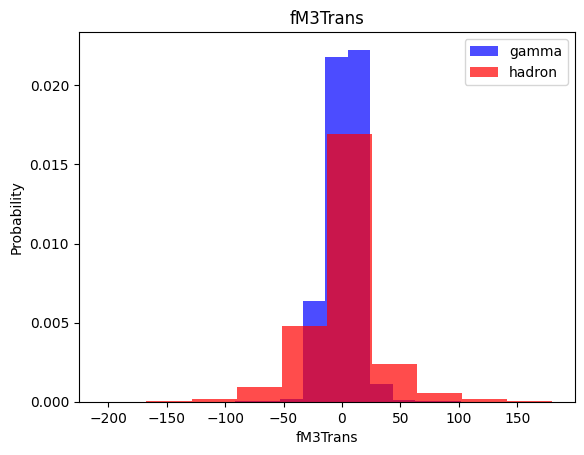

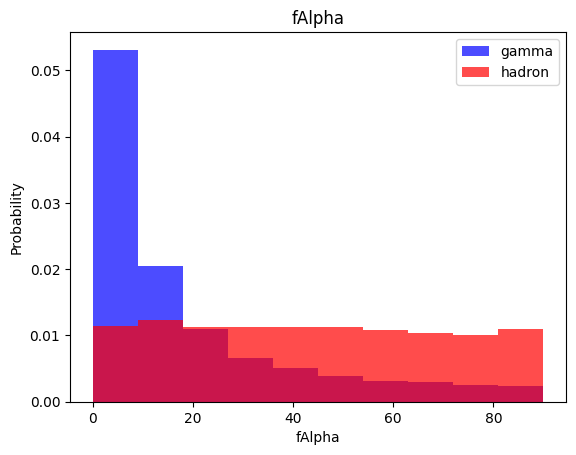

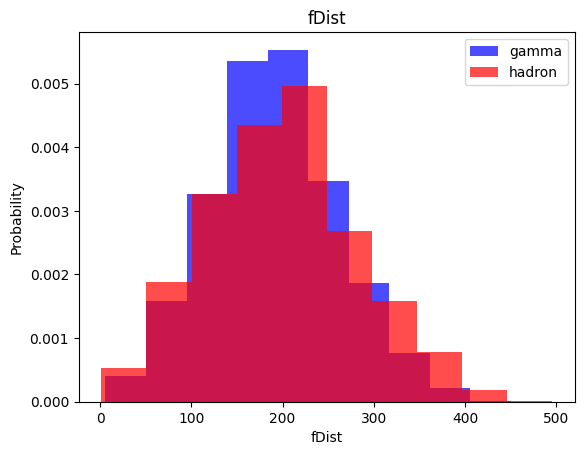

In [11]:
for labels in cols[:-1]:
    plt.hist(df[df["class"] == 1][labels], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][labels], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(labels)
    plt.ylabel("Probability")
    plt.xlabel(labels)
    plt.legend()
    plt.show()

In [12]:
train_val , test = train_test_split(df, test_size=0.2, random_state=42)
train , val = train_test_split(train_val, test_size=0.2, random_state=42)

In [13]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

# only 4283 are hadrons and 7889 are gamma this can be problem , so we need to increase number of hadrons
# to do this we use over sampler

7889
4283


In [14]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y


In [15]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

# only 4283 are hadrons and 7889 are gamma this can be problem , so we need to increase number of hadrons
# to do this we use over sampler
# so we set oversample = True in function call

7889
4283


In [16]:
train , X_train, y_train = scale_dataset(train , oversample=True)
val , X_val, y_val = scale_dataset(val , oversample=False)
test , X_test, y_test = scale_dataset(test , oversample=False)

In [17]:
print(sum(y_train == 1))
print(sum(y_train == 0))

# now both has same number of values

7889
7889


## K-Nearest neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
knn_pred = knn_model.predict(X_test)

In [21]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1344
           1       0.85      0.85      0.85      2460

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [24]:
nb_pred = nb_model.predict(X_test)

In [25]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.71      0.44      0.54      1344
           1       0.75      0.90      0.82      2460

    accuracy                           0.74      3804
   macro avg       0.73      0.67      0.68      3804
weighted avg       0.73      0.74      0.72      3804



## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
log_pred = log_model.predict(X_test)
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1344
           1       0.83      0.81      0.82      2460

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.77      0.77      0.77      3804



## Support Vector machine

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [31]:
svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1344
           1       0.88      0.89      0.89      2460

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



## Neural Network

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
def plot_history(history):
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4 ))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()


In [34]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr , batch_size, epochs):
    nn_model = tf.keras.Sequential([
        Dense(num_nodes, activation='relu'),
        Dropout(dropout_prob), #randomly chooses some nodes and does not train them ('helps prevent overfitting')
        Dense(num_nodes, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=Adam(lr), loss='binary_crossentropy',  metrics=['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

16 nodes, dropout 0, learning rate 0.01, batch size 32


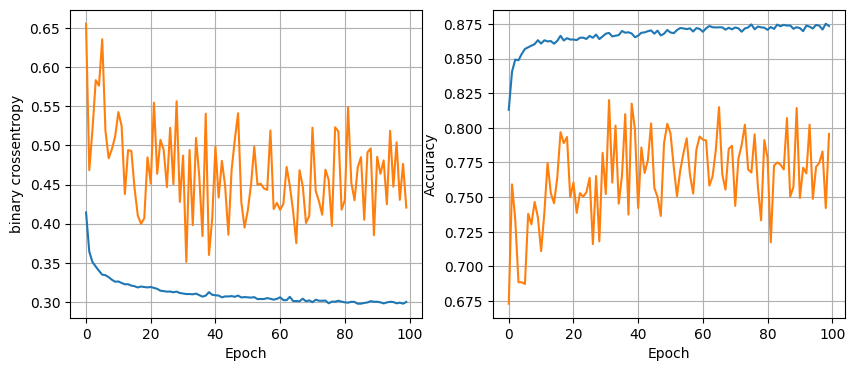

96/96 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8558
16 nodes, dropout 0, learning rate 0.01, batch size 64


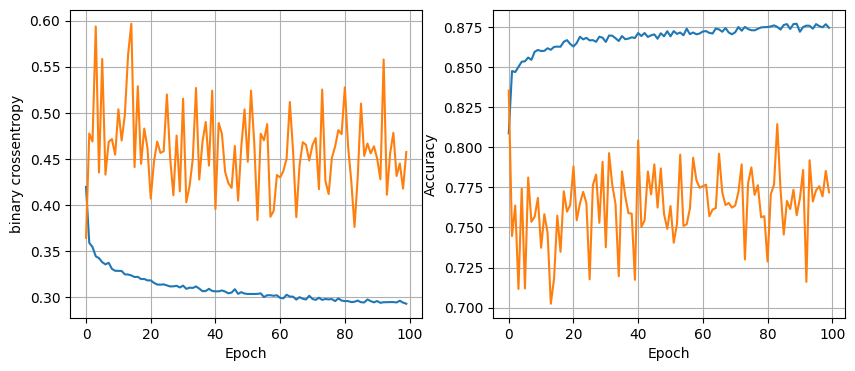

96/96 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8673
16 nodes, dropout 0, learning rate 0.01, batch size 128


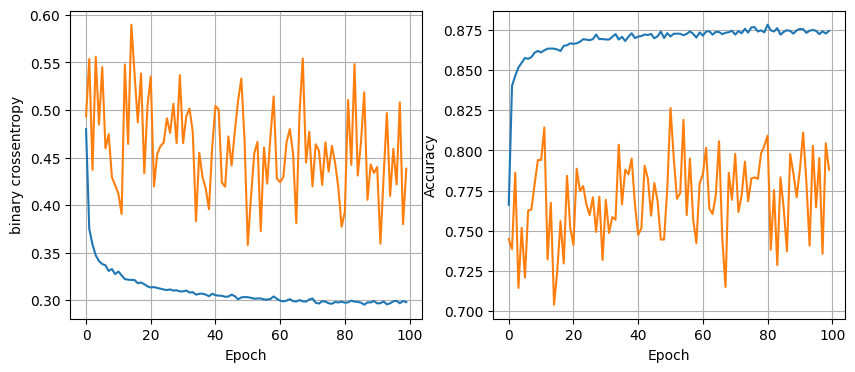

96/96 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8699
16 nodes, dropout 0, learning rate 0.005, batch size 32


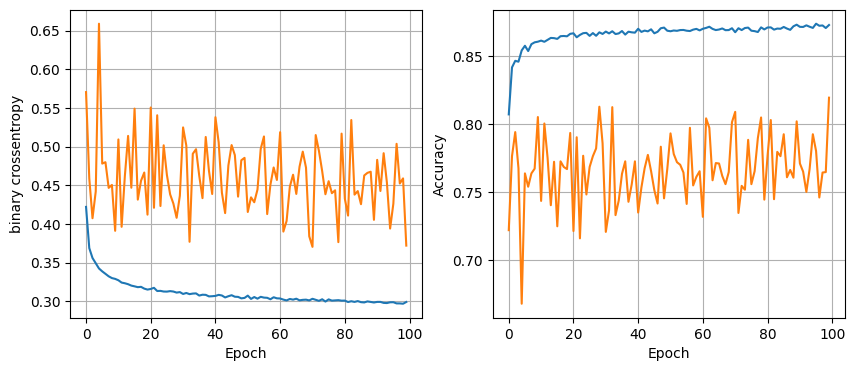

96/96 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8650
16 nodes, dropout 0, learning rate 0.005, batch size 64


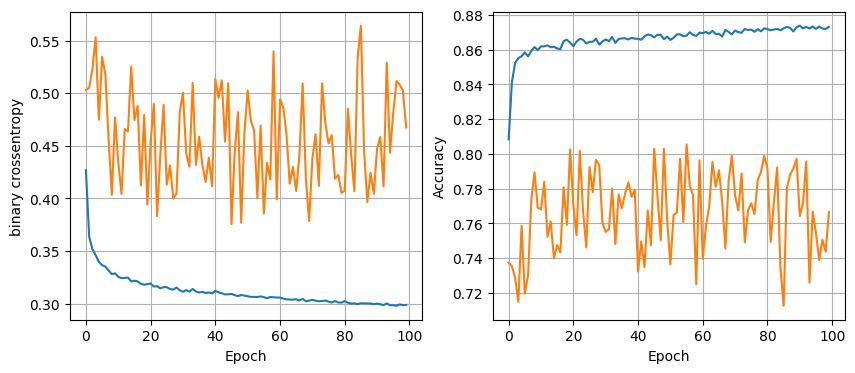

96/96 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.8725
16 nodes, dropout 0, learning rate 0.005, batch size 128


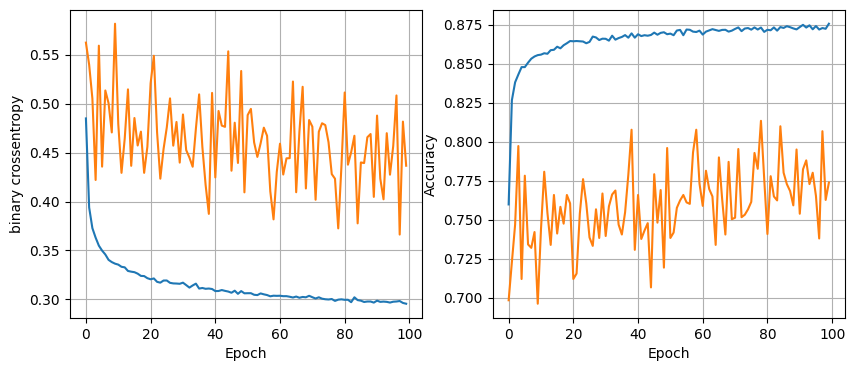

96/96 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8630
16 nodes, dropout 0, learning rate 0.001, batch size 32


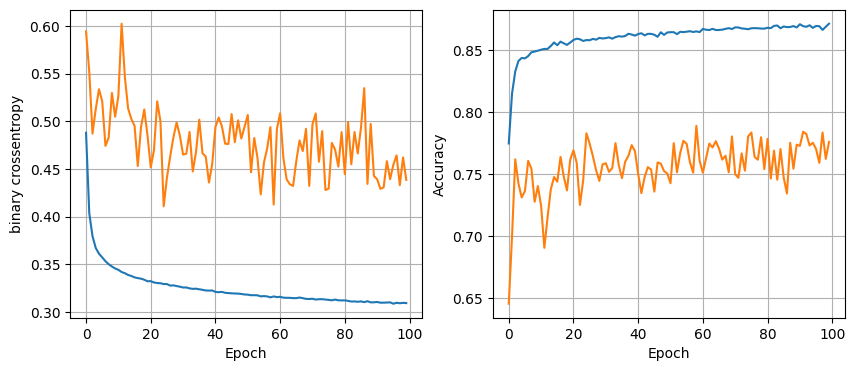

96/96 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8699
16 nodes, dropout 0, learning rate 0.001, batch size 64


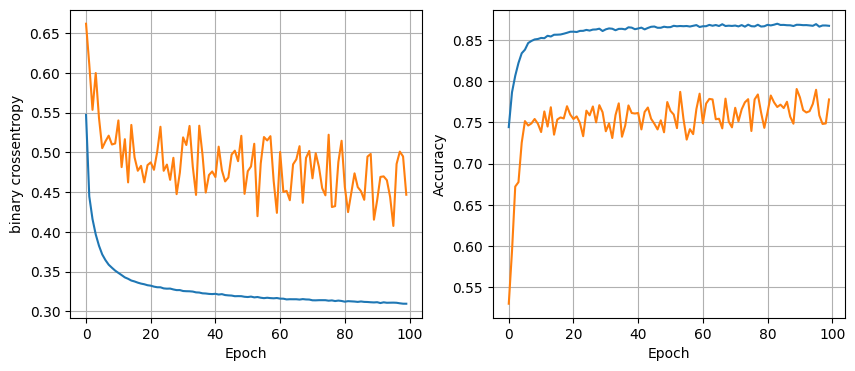

96/96 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8719
16 nodes, dropout 0, learning rate 0.001, batch size 128


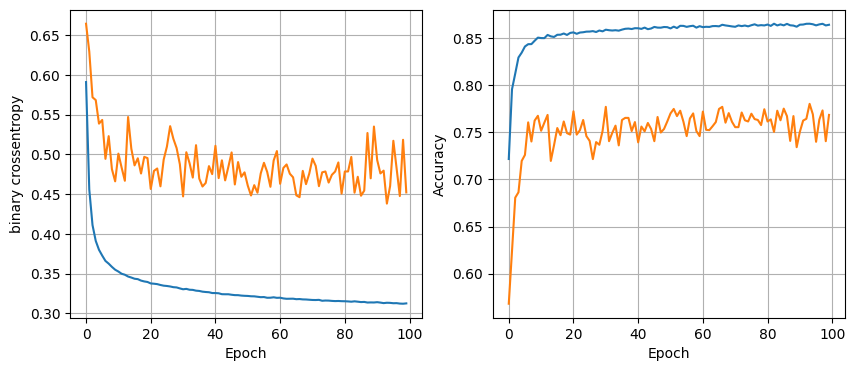

96/96 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8706
16 nodes, dropout 0.2, learning rate 0.01, batch size 32


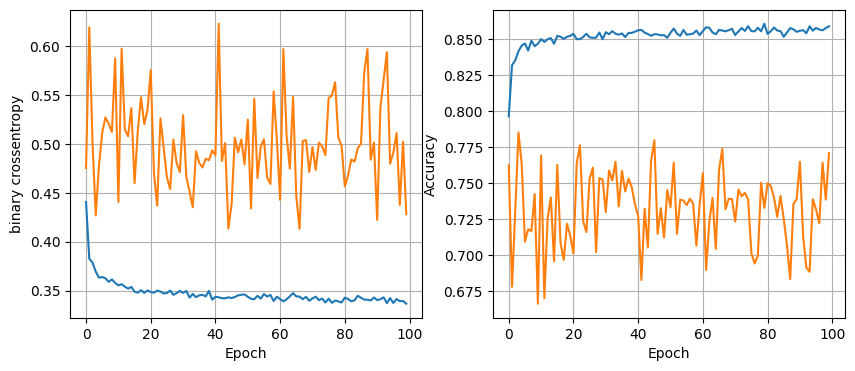

96/96 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8706
16 nodes, dropout 0.2, learning rate 0.01, batch size 64


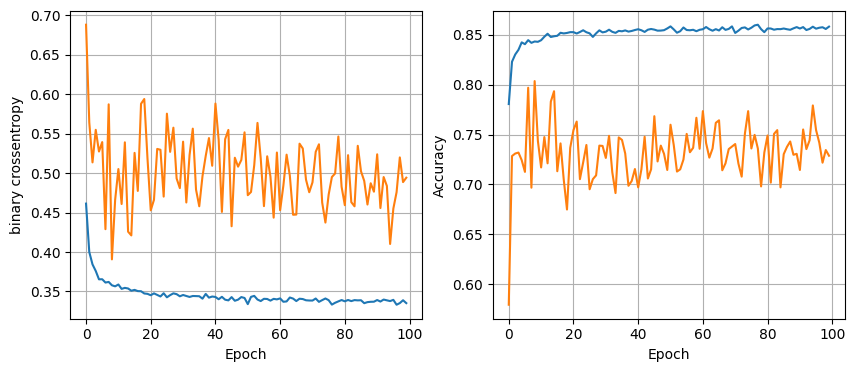

96/96 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8660
16 nodes, dropout 0.2, learning rate 0.01, batch size 128


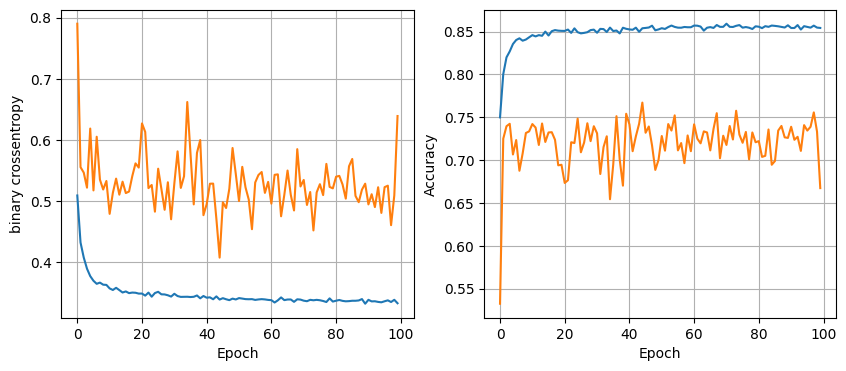

96/96 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8594
16 nodes, dropout 0.2, learning rate 0.005, batch size 32


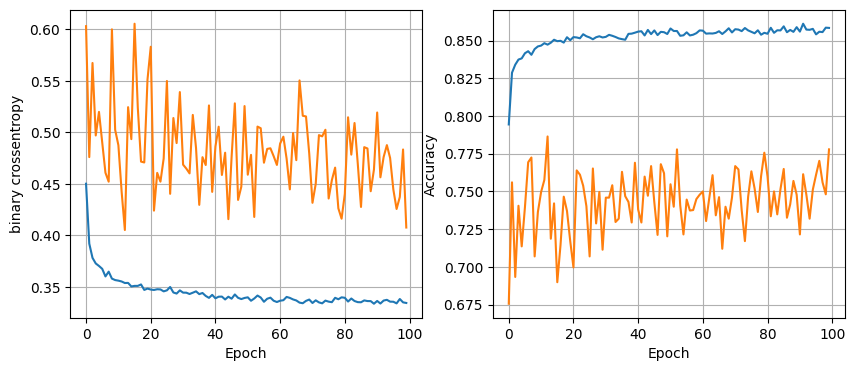

96/96 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8643
16 nodes, dropout 0.2, learning rate 0.005, batch size 64


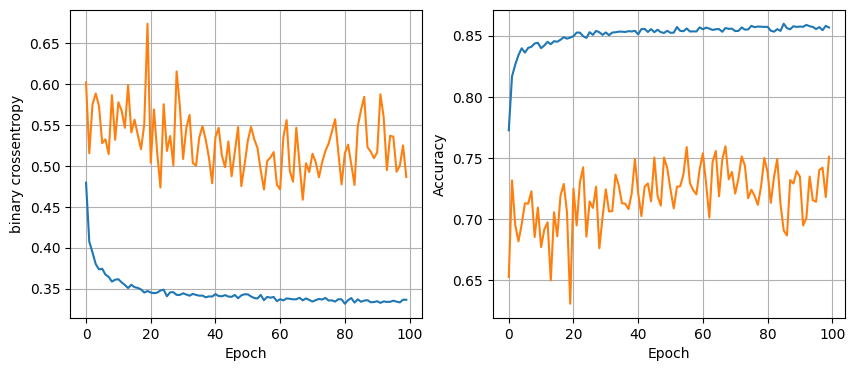

96/96 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8660
16 nodes, dropout 0.2, learning rate 0.005, batch size 128


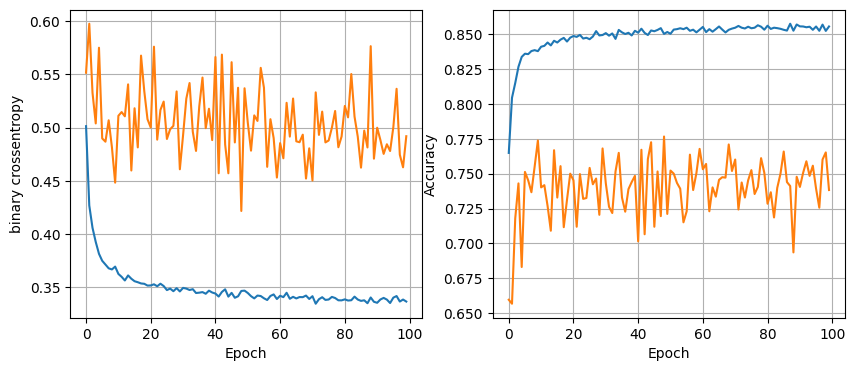

96/96 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8683
16 nodes, dropout 0.2, learning rate 0.001, batch size 32


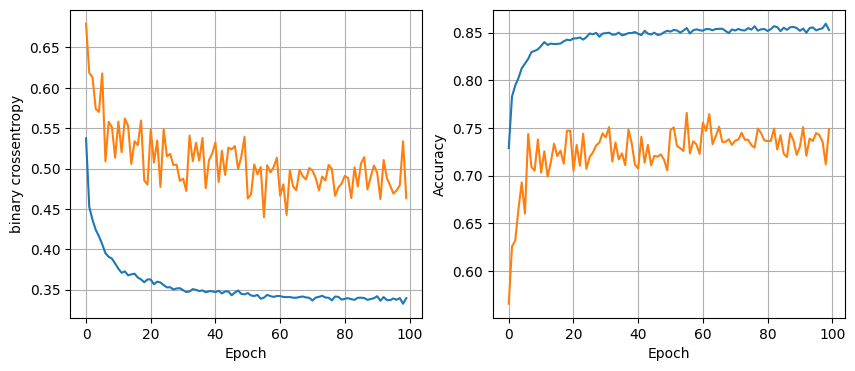

96/96 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8709
16 nodes, dropout 0.2, learning rate 0.001, batch size 64


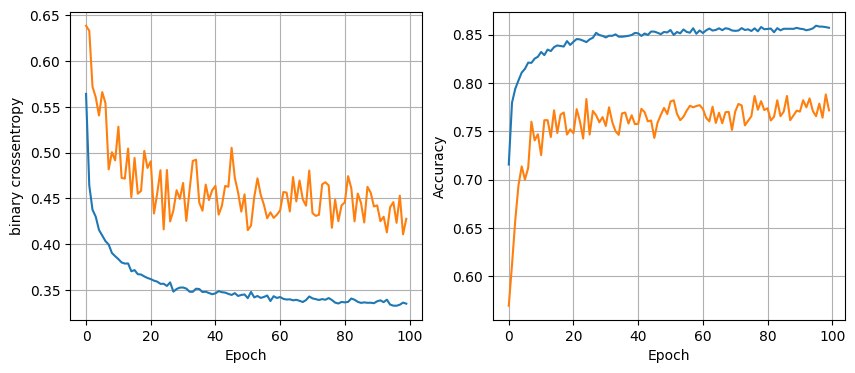

96/96 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8670
16 nodes, dropout 0.2, learning rate 0.001, batch size 128


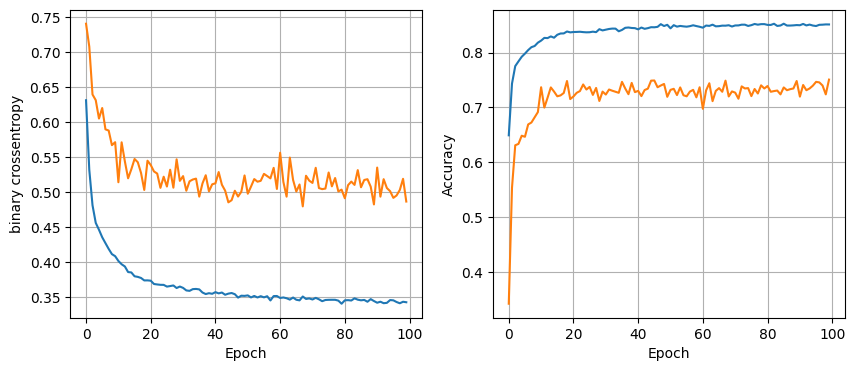

96/96 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8719
32 nodes, dropout 0, learning rate 0.01, batch size 32


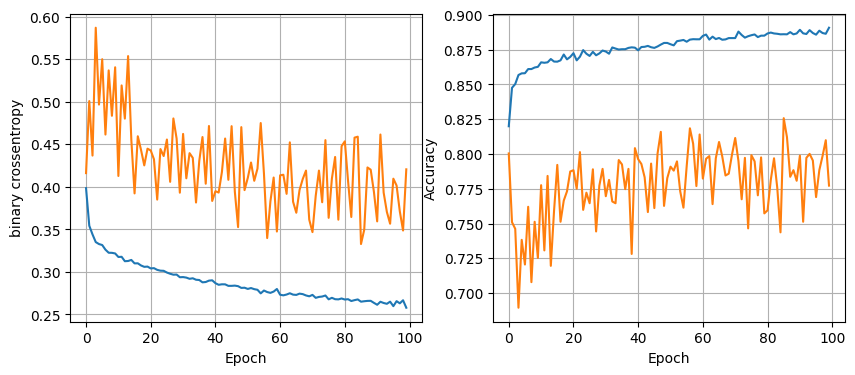

96/96 [==============================] - 0s 3ms/step - loss: 0.3956 - accuracy: 0.8607
32 nodes, dropout 0, learning rate 0.01, batch size 64


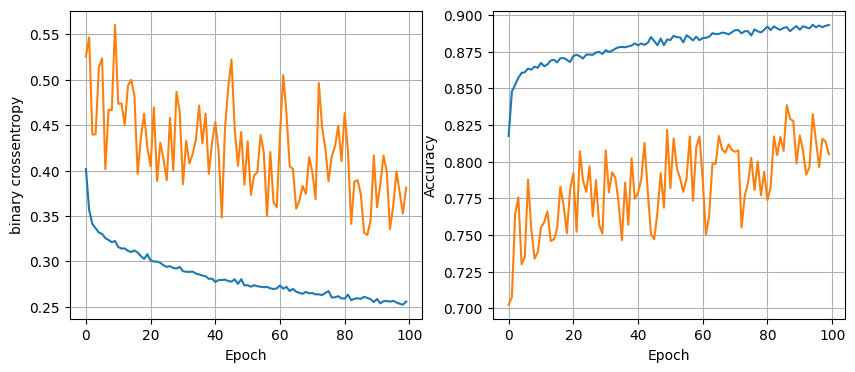

96/96 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8614
32 nodes, dropout 0, learning rate 0.01, batch size 128


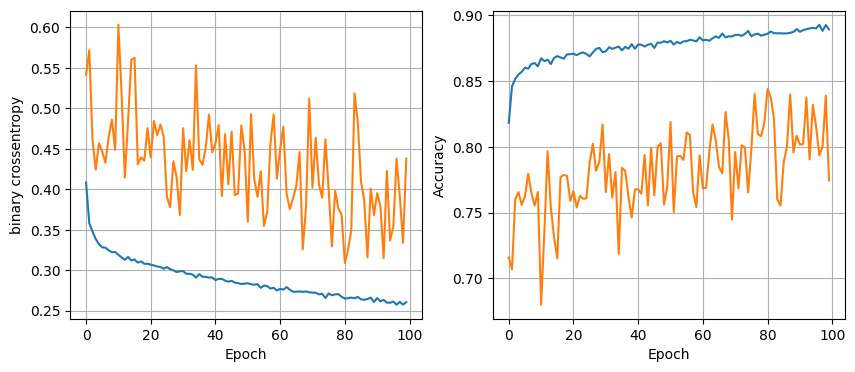

96/96 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8581
32 nodes, dropout 0, learning rate 0.005, batch size 32


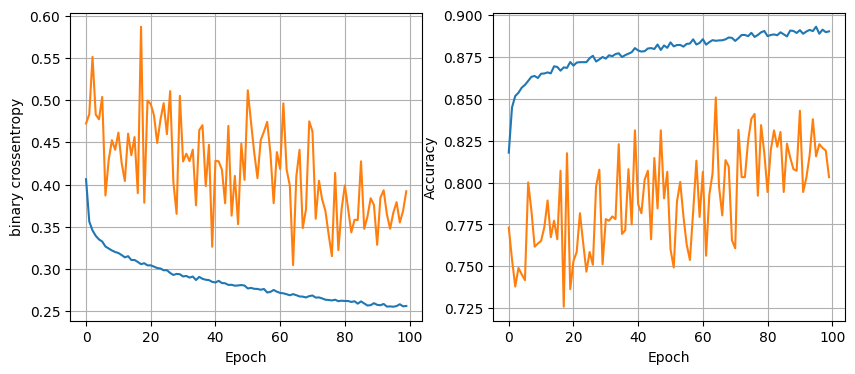

96/96 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.8607
32 nodes, dropout 0, learning rate 0.005, batch size 64


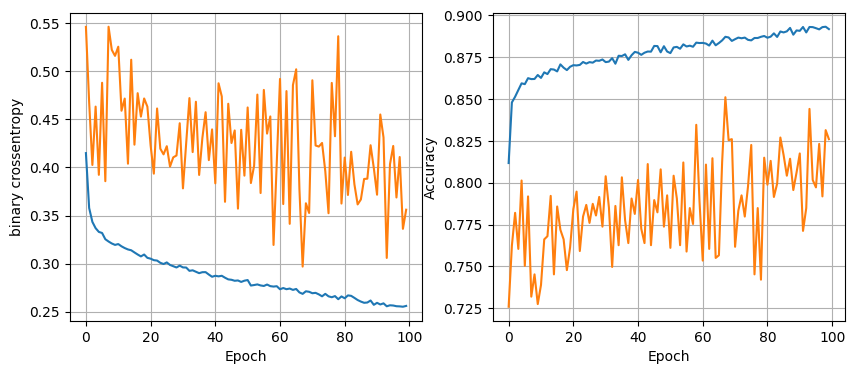

96/96 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.8614
32 nodes, dropout 0, learning rate 0.005, batch size 128


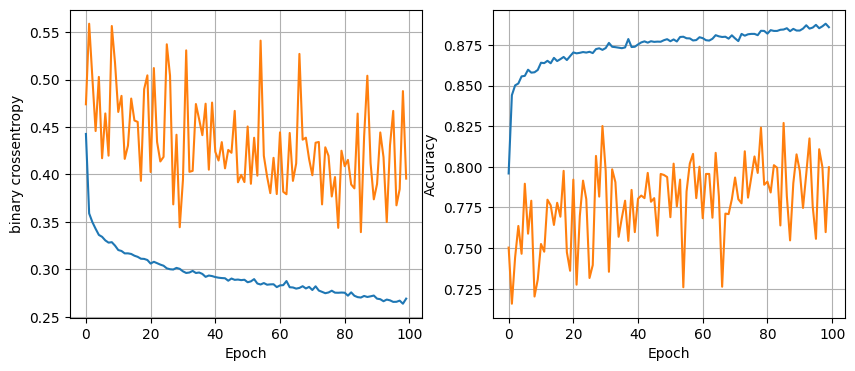

96/96 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8620
32 nodes, dropout 0, learning rate 0.001, batch size 32


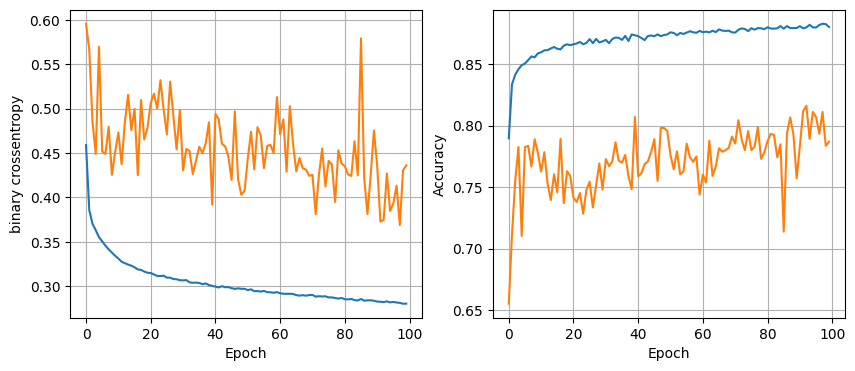

96/96 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8660
32 nodes, dropout 0, learning rate 0.001, batch size 64


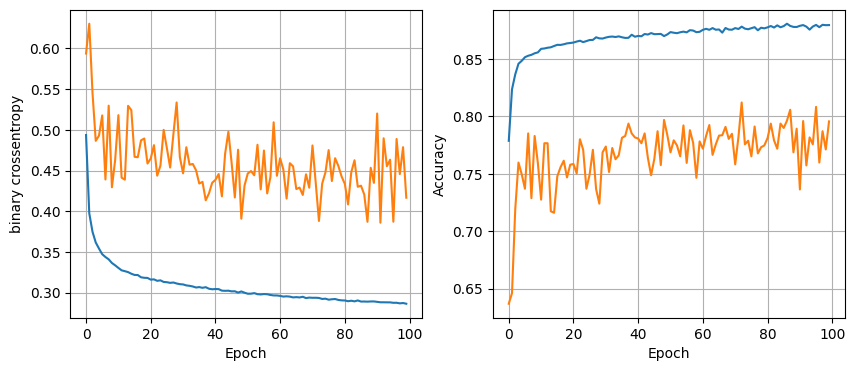

96/96 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8686
32 nodes, dropout 0, learning rate 0.001, batch size 128


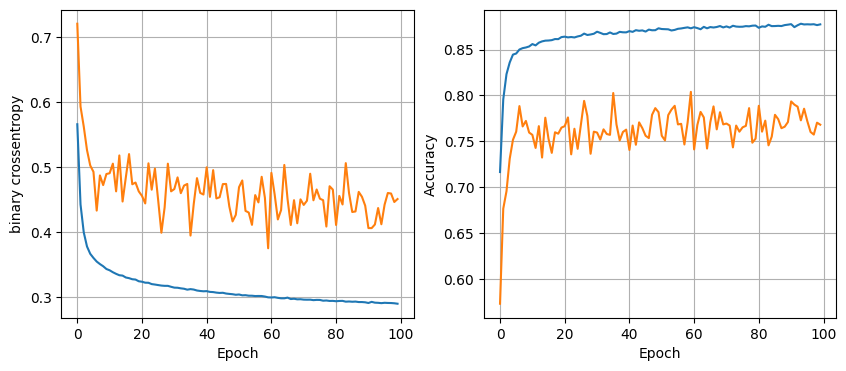

96/96 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8706
32 nodes, dropout 0.2, learning rate 0.01, batch size 32


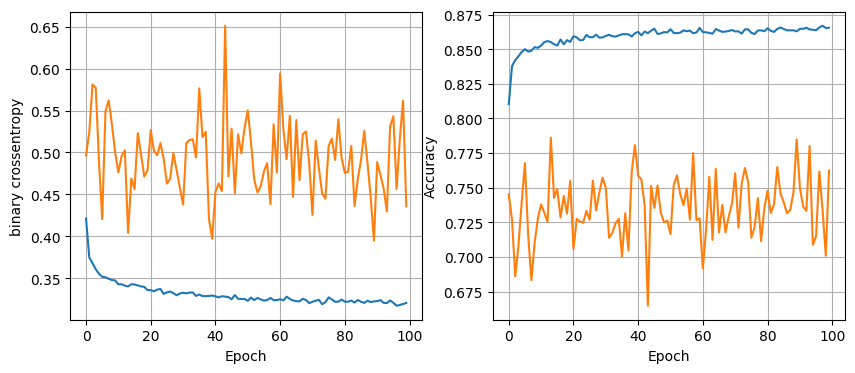

96/96 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8620
32 nodes, dropout 0.2, learning rate 0.01, batch size 64


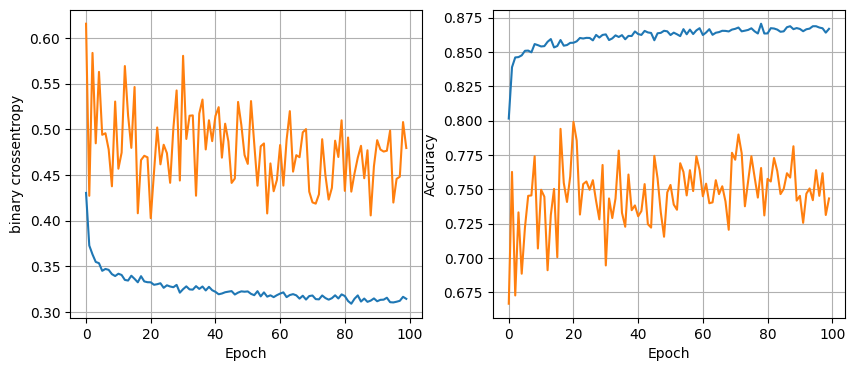

96/96 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8699
32 nodes, dropout 0.2, learning rate 0.01, batch size 128


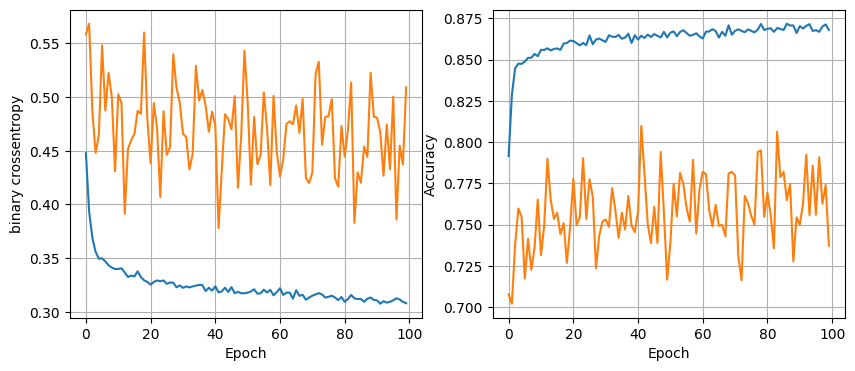

96/96 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8673
32 nodes, dropout 0.2, learning rate 0.005, batch size 32


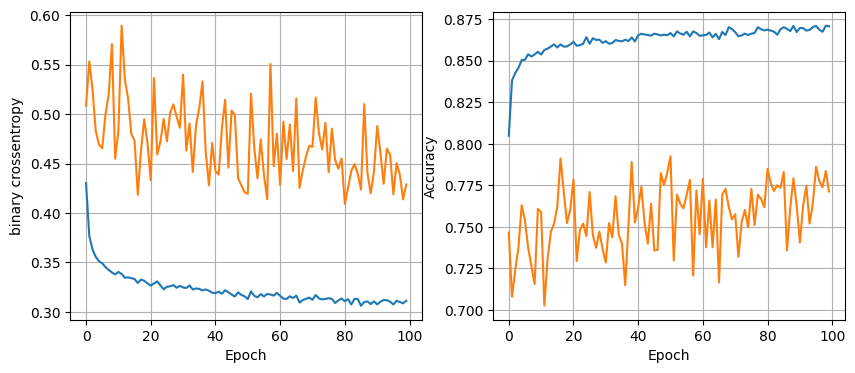

96/96 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8693
32 nodes, dropout 0.2, learning rate 0.005, batch size 64


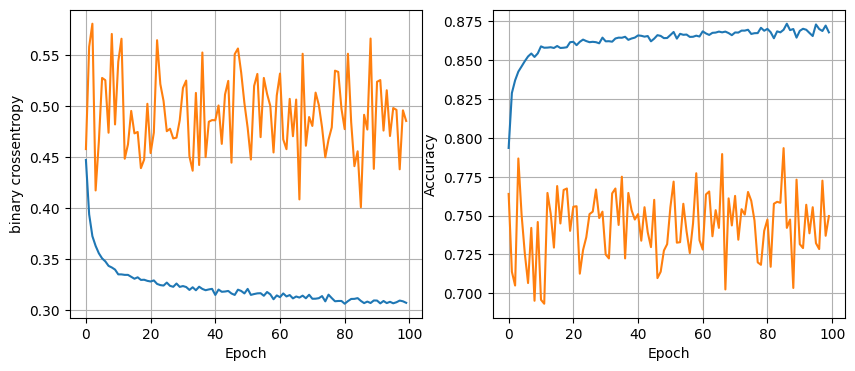

96/96 [==============================] - 0s 4ms/step - loss: 0.3156 - accuracy: 0.8686
32 nodes, dropout 0.2, learning rate 0.005, batch size 128


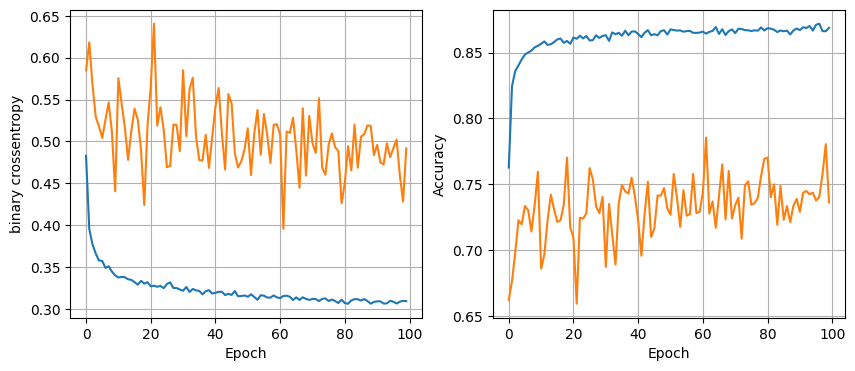

96/96 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8702
32 nodes, dropout 0.2, learning rate 0.001, batch size 32


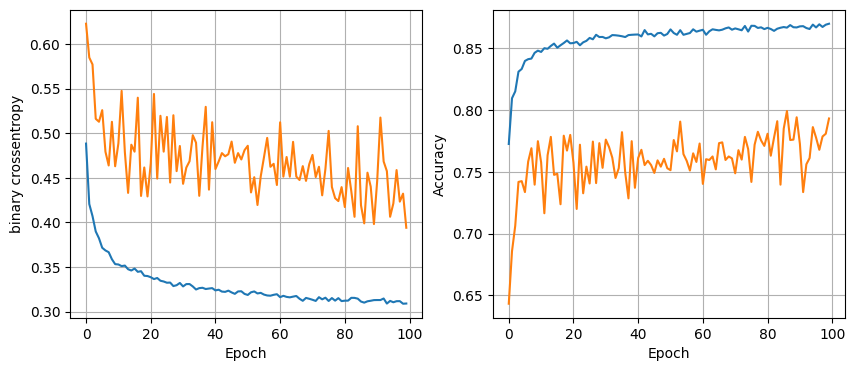

96/96 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8660
32 nodes, dropout 0.2, learning rate 0.001, batch size 64


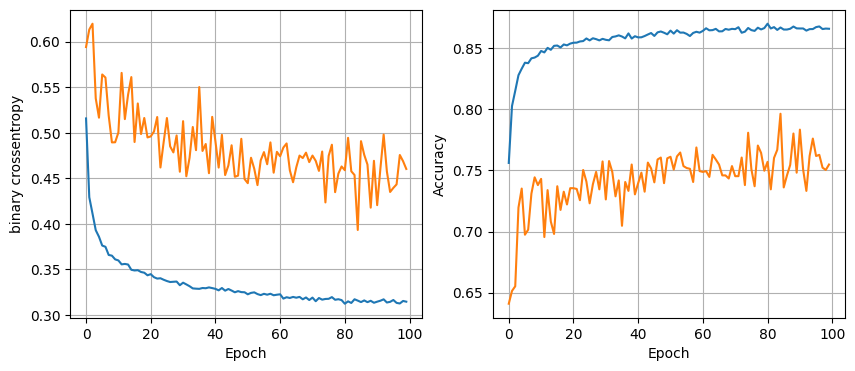

96/96 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8712
32 nodes, dropout 0.2, learning rate 0.001, batch size 128


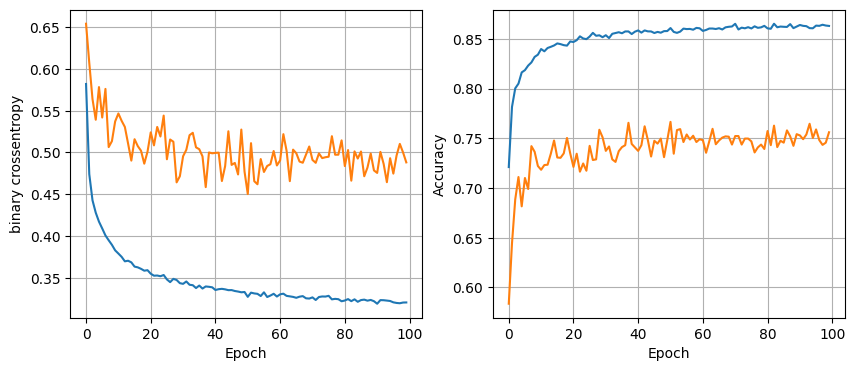

96/96 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8745
64 nodes, dropout 0, learning rate 0.01, batch size 32


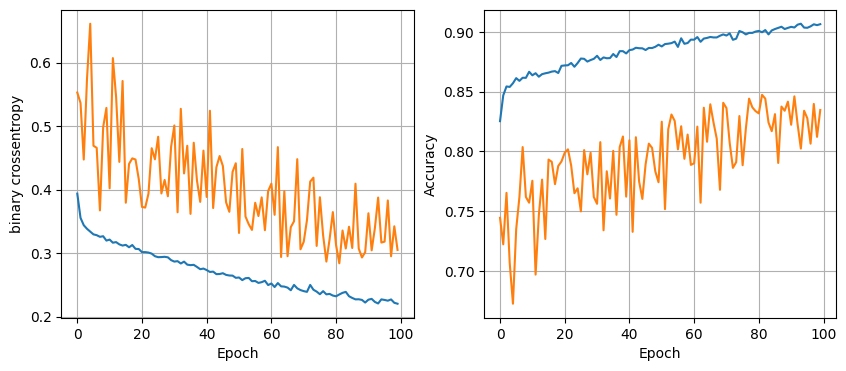

96/96 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.8568
64 nodes, dropout 0, learning rate 0.01, batch size 64


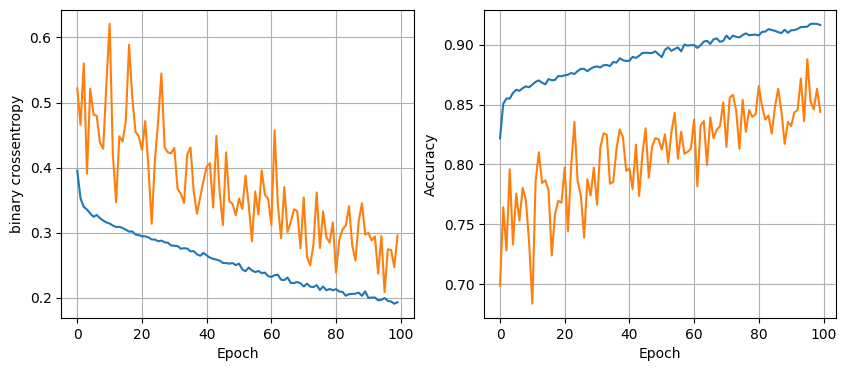

96/96 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.8584
64 nodes, dropout 0, learning rate 0.01, batch size 128


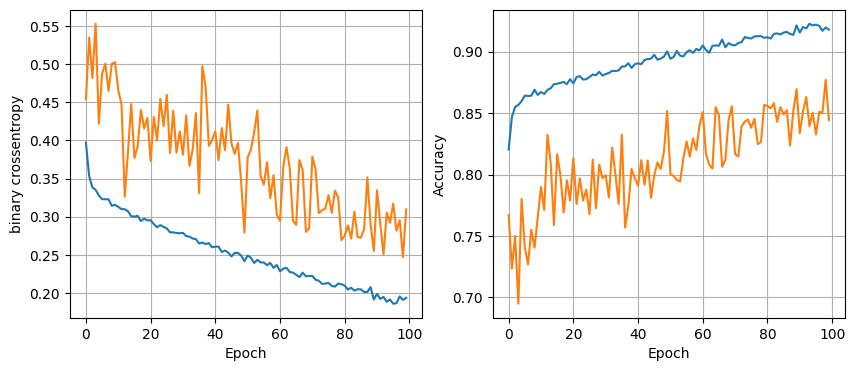

96/96 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.8551
64 nodes, dropout 0, learning rate 0.005, batch size 32


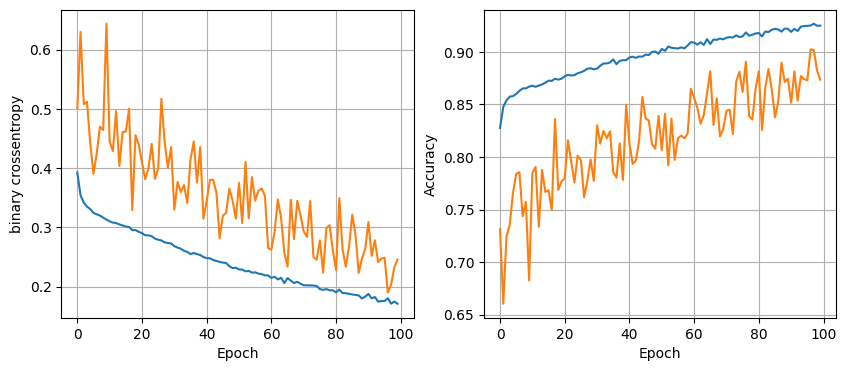

96/96 [==============================] - 0s 3ms/step - loss: 0.5807 - accuracy: 0.8440
64 nodes, dropout 0, learning rate 0.005, batch size 64


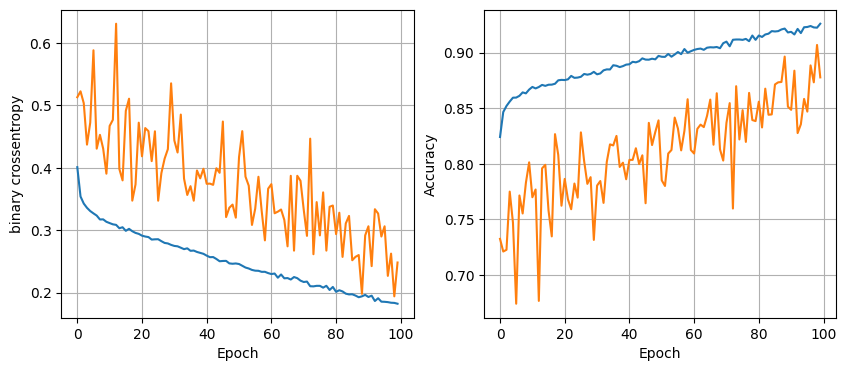

96/96 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.8449
64 nodes, dropout 0, learning rate 0.005, batch size 128


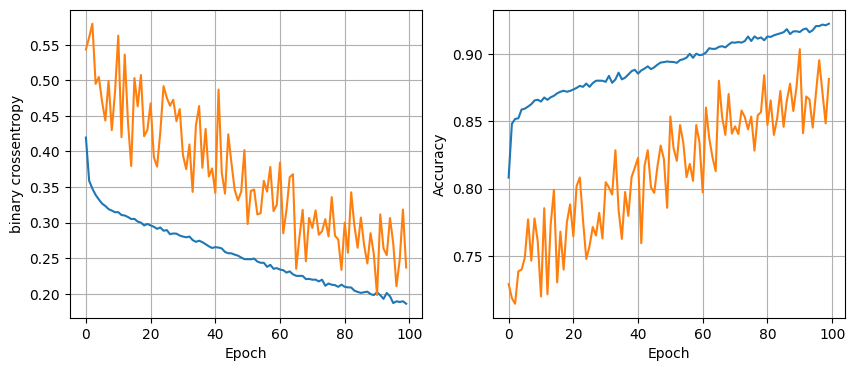

96/96 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8551
64 nodes, dropout 0, learning rate 0.001, batch size 32


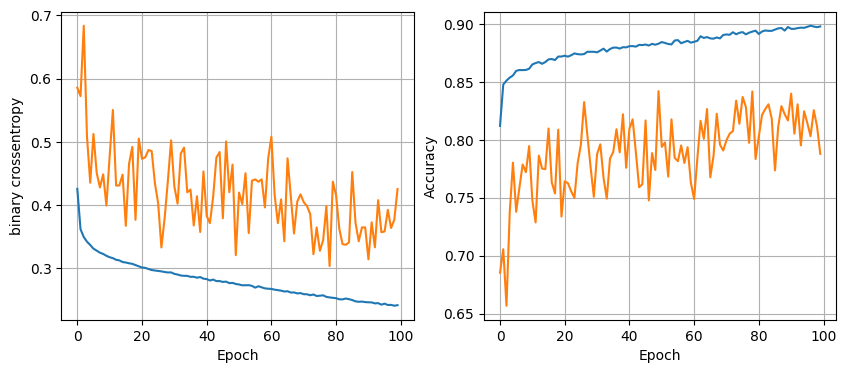

96/96 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.8679
64 nodes, dropout 0, learning rate 0.001, batch size 64


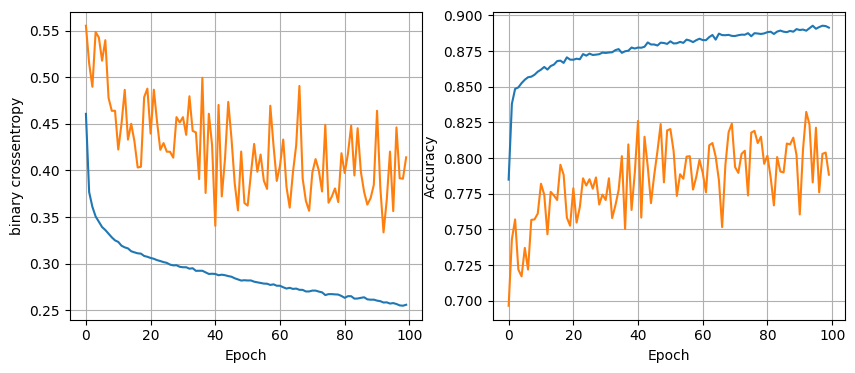

96/96 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8683
64 nodes, dropout 0, learning rate 0.001, batch size 128


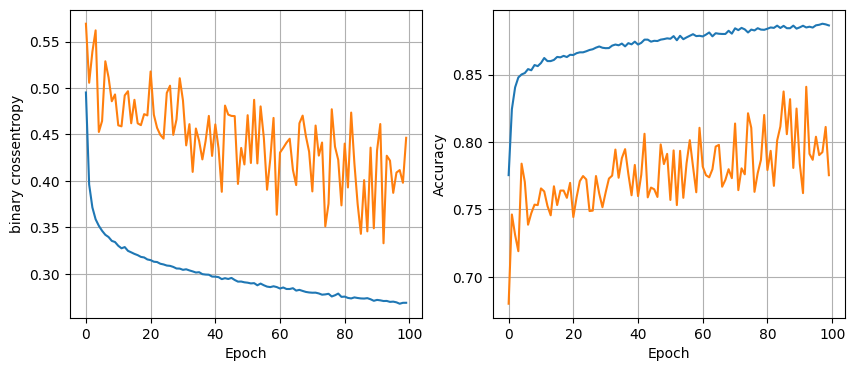

96/96 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8673
64 nodes, dropout 0.2, learning rate 0.01, batch size 32


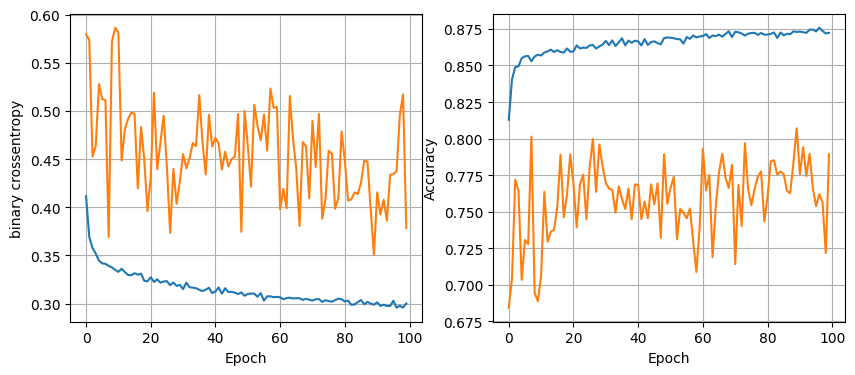

96/96 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.8624
64 nodes, dropout 0.2, learning rate 0.01, batch size 64


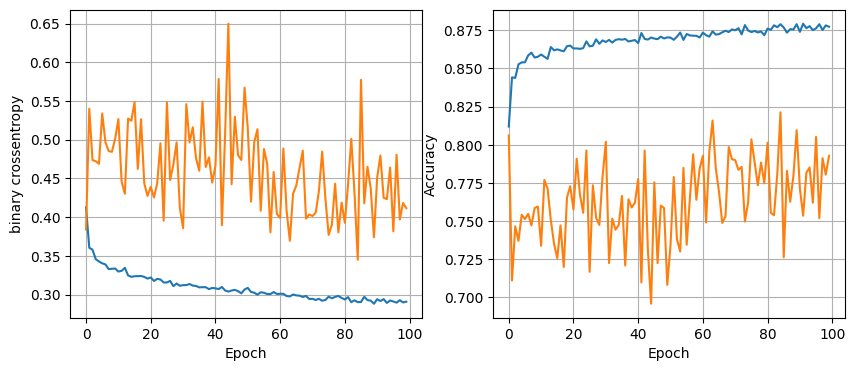

96/96 [==============================] - 0s 4ms/step - loss: 0.3330 - accuracy: 0.8630
64 nodes, dropout 0.2, learning rate 0.01, batch size 128


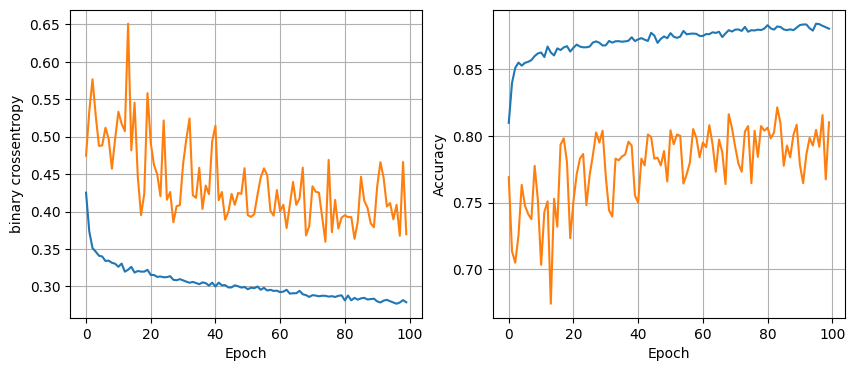

96/96 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8709
64 nodes, dropout 0.2, learning rate 0.005, batch size 32


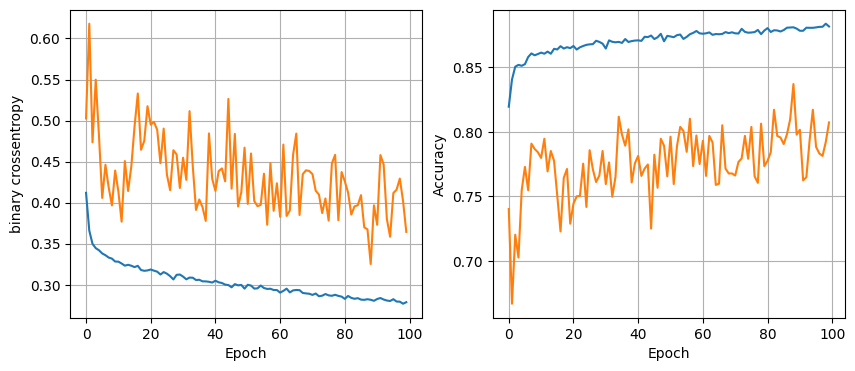

96/96 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8637
64 nodes, dropout 0.2, learning rate 0.005, batch size 64


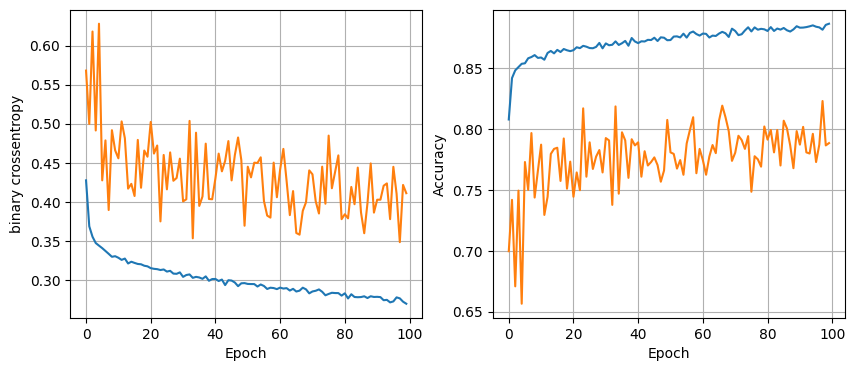

96/96 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.8670
64 nodes, dropout 0.2, learning rate 0.005, batch size 128


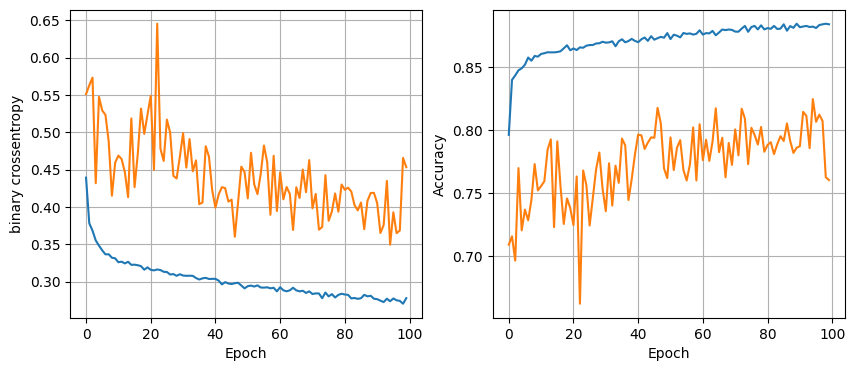

96/96 [==============================] - 0s 3ms/step - loss: 0.3238 - accuracy: 0.8650
64 nodes, dropout 0.2, learning rate 0.001, batch size 32


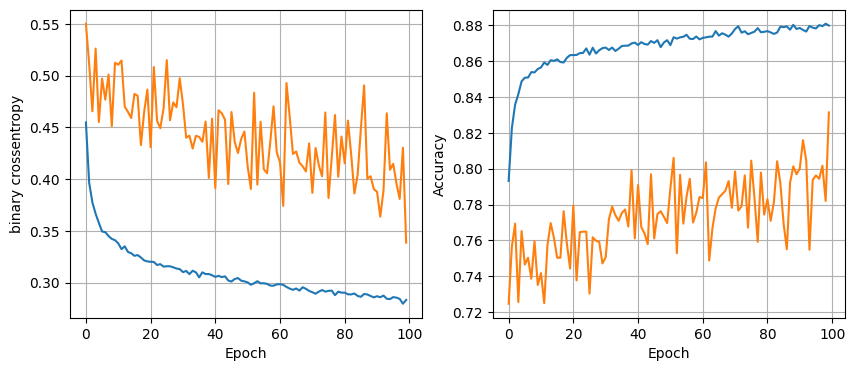

96/96 [==============================] - 0s 4ms/step - loss: 0.3112 - accuracy: 0.8768
64 nodes, dropout 0.2, learning rate 0.001, batch size 64


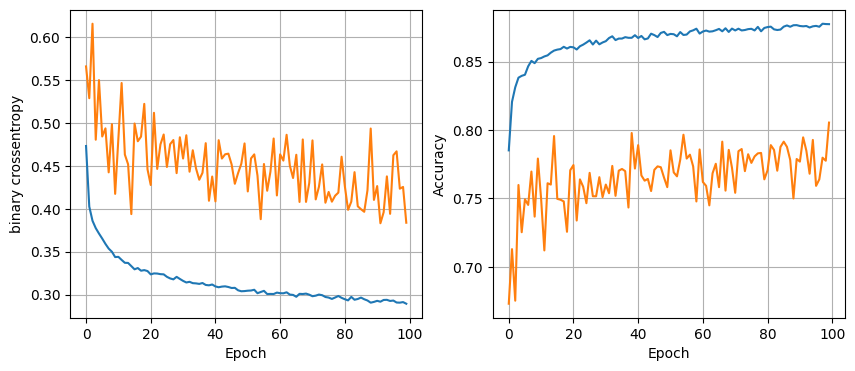

96/96 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8686
64 nodes, dropout 0.2, learning rate 0.001, batch size 128


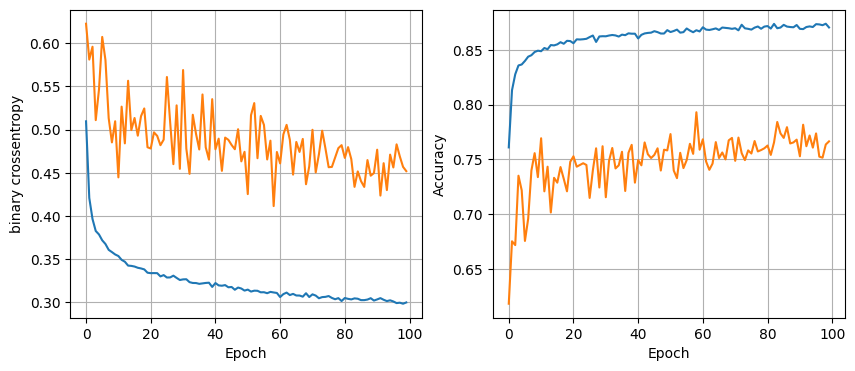

96/96 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8748


In [35]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning rate {lr}, batch size {batch_size}")
                model ,history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_val, y_val)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model

In [36]:
nn_pred = least_loss_model.predict(X_test)
nn_pred = (nn_pred > 0.5).astype(int)

119/119 [==============================] - 0s 2ms/step


In [37]:
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1344
           1       0.88      0.91      0.89      2460

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

